# Radhika Ambulkar
data analyst intern 
duration : 1 August 2024 to 30 September 2024

# House Price Prediction Project

This housing dataset contains 545 records and the following attributes:

1. **Price**: The house price, ranging from ₹1,750,000 to ₹13,300,000, with an average of ₹4,766,729.
2. **Area**: The area of the house, ranging from 1,650 to 16,200 sq. ft, with an average of 5,150 sq. ft.
3. **Bedrooms**: The number of bedrooms, ranging from 1 to 6, with an average of around 3 bedrooms.
4. **Bathrooms**: The number of bathrooms, ranging from 1 to 4, with most homes having 1 to 2 bathrooms.
5. **Stories**: The number of floors in the house, ranging from 1 to 4, with most homes having 1 or 2 floors.
6. **Mainroad**: Whether the house is located on a main road (yes or no).
7. **Guestroom**: Whether the house has a guest room (yes or no).
8. **Basement**: Whether the house has a basement (yes or no).
9. **Hotwaterheating**: Whether the house has hot water heating (yes or no).
10. **Airconditioning**: Whether the house has air conditioning (yes or no).
11. **Parking**: The number of parking spaces, ranging from 0 to 3, with an average of 0.7 parking spaces.
12. **Prefarea**: Whether the house is located in a preferred area (yes or no).
13. **Furnishingstatus**: The house's furnishing status (semi-furnished, unfurnished, or furnished).

This dataset covers various factors related to housing features, such as pricing, size, and amenities.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
hdata = pd.read_csv('housing.csv')

In [15]:
print(hdata.shape)

(545, 13)


In [7]:
print(hdata.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [5]:
print(hdata.tail())

       price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
540  1820000  3000         2          1        1      yes        no      yes   
541  1767150  2400         3          1        1       no        no       no   
542  1750000  3620         2          1        1      yes        no       no   
543  1750000  2910         3          1        1       no        no       no   
544  1750000  3850         3          1        2      yes        no       no   

    hotwaterheating airconditioning  parking prefarea furnishingstatus  
540              no              no        2       no      unfurnished  
541              no              no        0       no   semi-furnished  
542              no              no        0       no      unfurnished  
543              no              no        0       no        furnished  
544              no              no        0       no      unfurnished  


In [8]:
print(hdata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


In [10]:
print(hdata.describe())

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


In [14]:
print("No of null values :\n",hdata.isnull().sum())
hdata = hdata.dropna()
print("No of null values after removing :\n",hdata.isnull().sum())

No of null values :
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64
No of null values after removing :
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


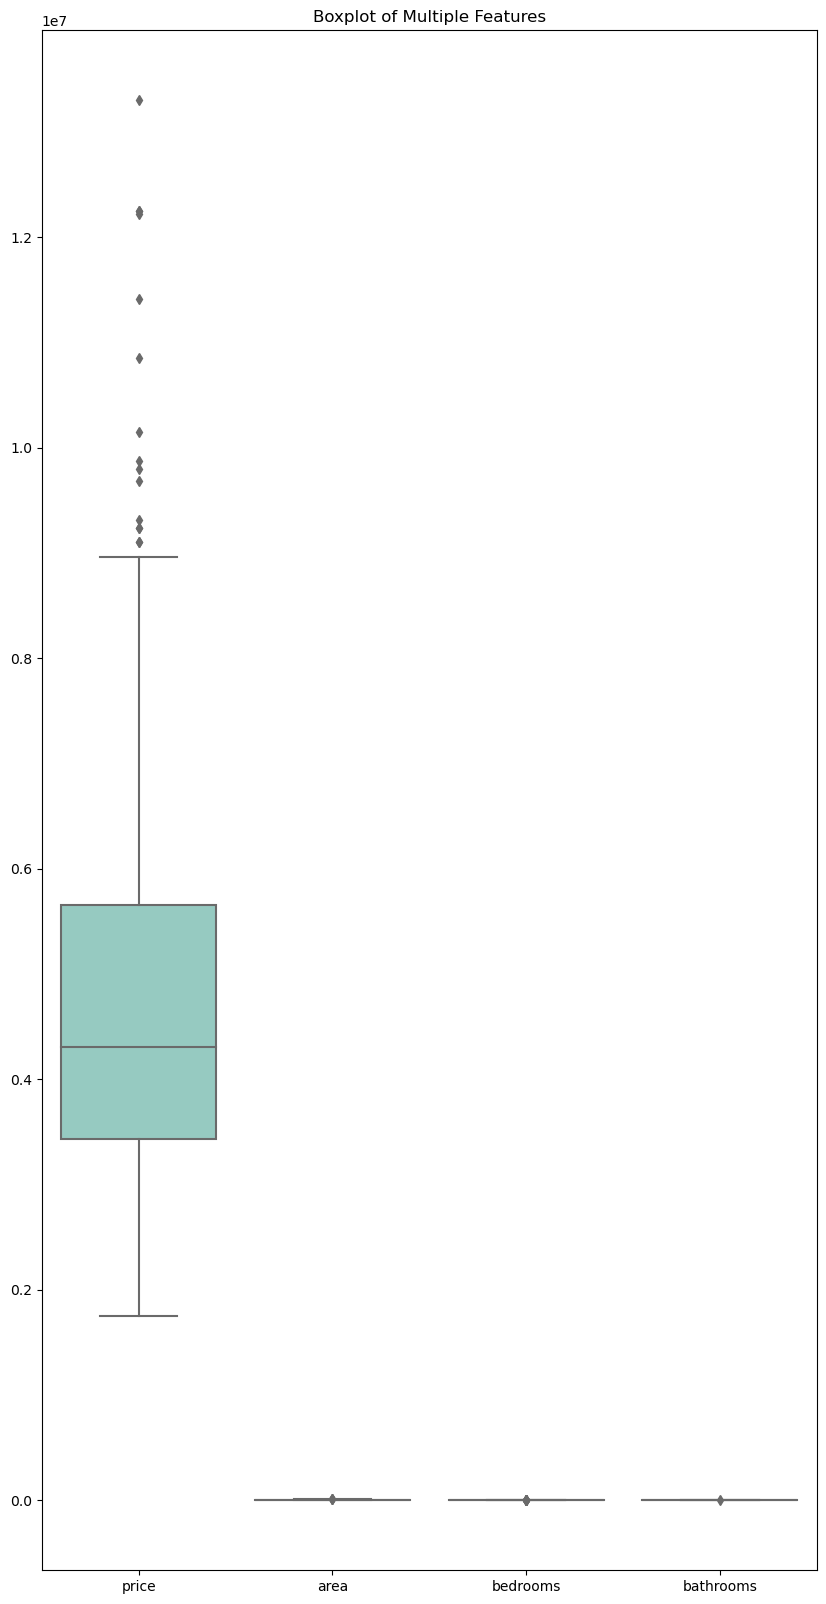

In [35]:
plt.figure(figsize=(10, 20))

columns = ['price', 'area', 'bedrooms', 'bathrooms']
sns.boxplot(data=housing_data_cleaned[columns], palette='Set3')

plt.title('Boxplot of Multiple Features')
plt.xticks()
plt.show()


In [17]:
# Function to remove outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_out = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_out

housing_data_cleaned = remove_outliers(hdata, 'price')
housing_data_cleaned = remove_outliers(hdata, 'area')

print(hdata.shape)



(545, 13)


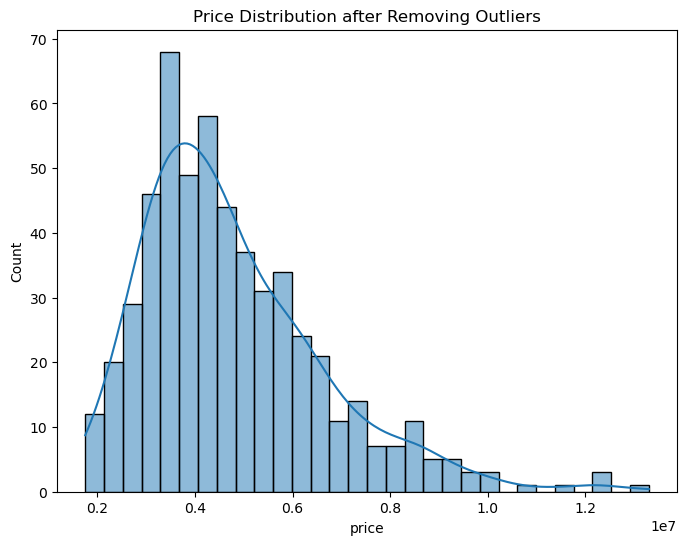

In [23]:

plt.figure(figsize=(8, 6))
sns.histplot(hdata['price'], bins=30, kde=True)
plt.title('Price Distribution after Removing Outliers')
plt.show()




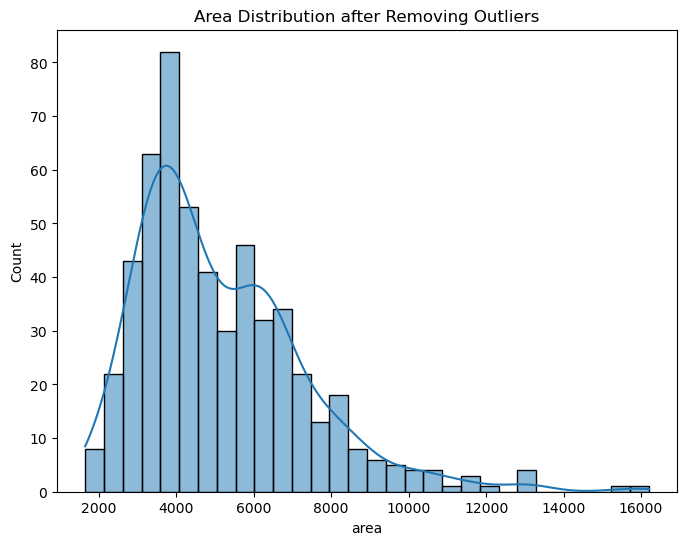

In [24]:
plt.figure(figsize=(8, 6))
sns.histplot(hdata['area'], bins=30, kde=True)
plt.title('Area Distribution after Removing Outliers')
plt.show()

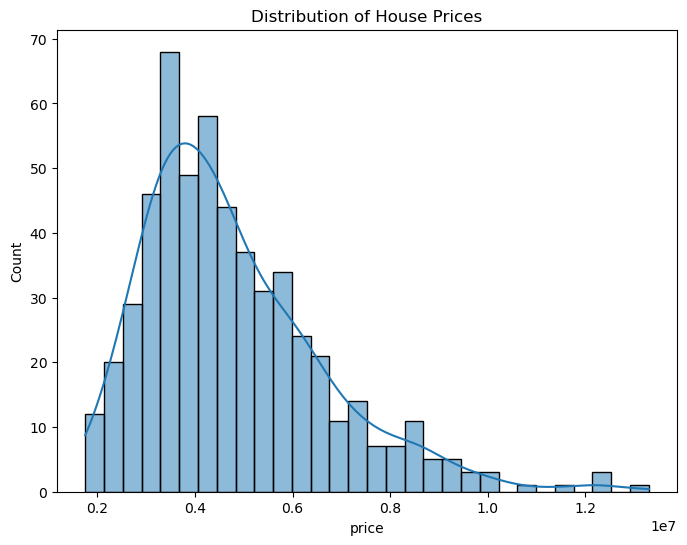

In [22]:
plt.figure(figsize=(8, 6))
sns.histplot(hdata['price'], bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.show()



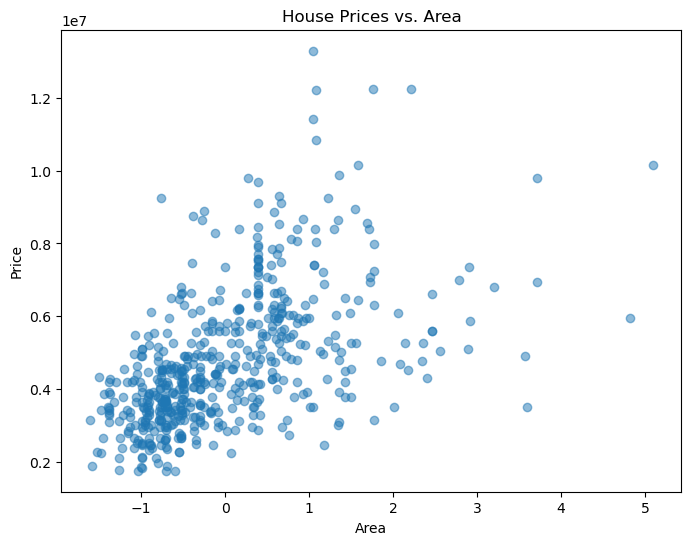

In [48]:
plt.figure(figsize=(8, 6))
plt.scatter(hdata['area'], hdata['price'], alpha=0.5)
plt.title('House Prices vs. Area')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()


              price      area  bedrooms  bathrooms   stories   parking
price      1.000000  0.535997  0.366494   0.517545  0.420712  0.384394
area       0.535997  1.000000  0.151858   0.193820  0.083996  0.352980
bedrooms   0.366494  0.151858  1.000000   0.373930  0.408564  0.139270
bathrooms  0.517545  0.193820  0.373930   1.000000  0.326165  0.177496
stories    0.420712  0.083996  0.408564   0.326165  1.000000  0.045547
parking    0.384394  0.352980  0.139270   0.177496  0.045547  1.000000


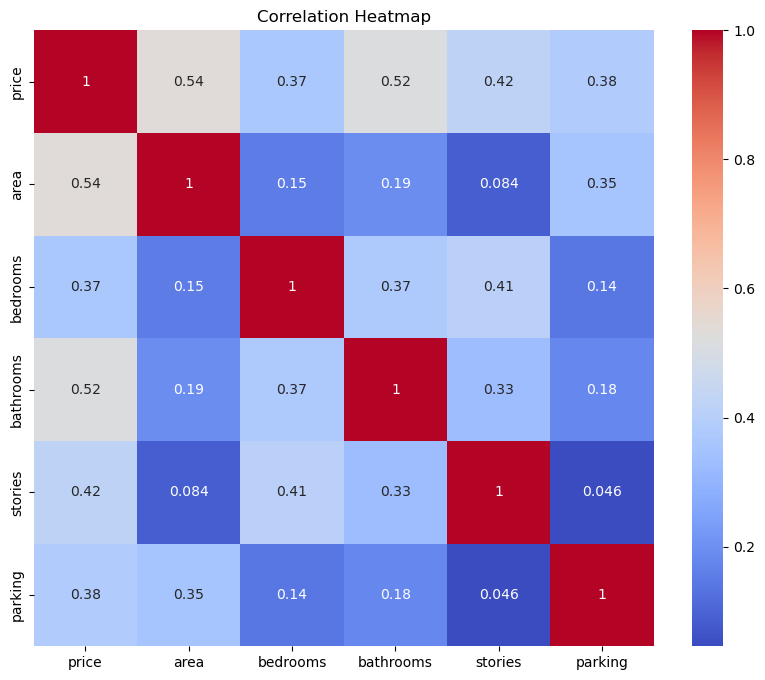

In [28]:
house_data= hdata.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 8))
corr_matrix = house_data.corr()
print(corr_matrix)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
label_encoder = LabelEncoder()
for column in ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']:
    hdata[column] = label_encoder.fit_transform(hdata[column])


In [38]:
print(hdata.head())

      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus  
0                 0  
1                 0  
2                 1  
3                 0  
4                 0  


In [40]:
hdata['price_per_sqft'] = hdata['price'] / hdata['area']

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
hdata[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']] = scaler.fit_transform(
    hdata[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']])
print(hdata.head())


      price      area  bedrooms  bathrooms   stories  mainroad  guestroom  \
0  13300000  1.046726  1.403419   1.421812  1.378217         1          0   
1  12250000  1.757010  1.403419   5.405809  2.532024         1          0   
2  12250000  2.218232  0.047278   1.421812  0.224410         1          0   
3  12215000  1.083624  1.403419   1.421812  0.224410         1          0   
4  11410000  1.046726  1.403419  -0.570187  0.224410         1          1   

   basement  hotwaterheating  airconditioning   parking  prefarea  \
0         0                0                1  1.517692         1   
1         0                0                1  2.679409         0   
2         1                0                0  1.517692         1   
3         1                0                1  2.679409         1   
4         1                0                1  1.517692         0   

   furnishingstatus  price_per_sqft  
0                 0    1.270628e+07  
1                 0    6.972074e+06  
2       

In [70]:
from sklearn.model_selection import train_test_split

X = hdata.drop(['price'], axis=1)
y = hdata['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)
print(X_train.info)
print(y_train.info)

Train set size: (436, 13)
Test set size: (109, 13)
<bound method DataFrame.info of          area  bedrooms  bathrooms   stories  mainroad  guestroom  basement  \
46   0.391790  0.047278   1.421812  2.532024         1          0         0   
93   0.945257  0.047278   1.421812 -0.929397         1          0         1   
335 -0.615521 -1.308863  -0.570187 -0.929397         1          0         1   
412 -1.171756  0.047278  -0.570187  0.224410         1          0         1   
471 -0.645962  0.047278  -0.570187  0.224410         1          0         0   
..        ...       ...        ...       ...       ...        ...       ...   
71   0.391790  1.403419   1.421812  2.532024         1          0         0   
106  0.138117  1.403419   1.421812 -0.929397         1          0         1   
270 -0.300045  0.047278   1.421812  1.378217         1          0         0   
435 -0.512207 -1.308863  -0.570187 -0.929397         1          0         0   
102  0.161178  0.047278   1.421812  2.532024    

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f'Linear Regression RMSE: {rmse}')
print(f'Linear Regression R² Score: {r2}')


Linear Regression RMSE: 1331672.6604429006
Linear Regression R² Score: 0.6491586844898973


In [43]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest RMSE: {rmse_rf}')
print(f'Random Forest R² Score: {r2_rf}')


Random Forest RMSE: 1160409.575112939
Random Forest R² Score: 0.7335974541092651


In [44]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_


y_pred_best_rf = best_rf_model.predict(X_test)

mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
rmse_best_rf = mse_best_rf ** 0.5
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f'Best Random Forest RMSE: {rmse_best_rf}')
print(f'Best Random Forest R² Score: {r2_best_rf}')


Best Random Forest RMSE: 1150203.5675693946
Best Random Forest R² Score: 0.7382629615639122


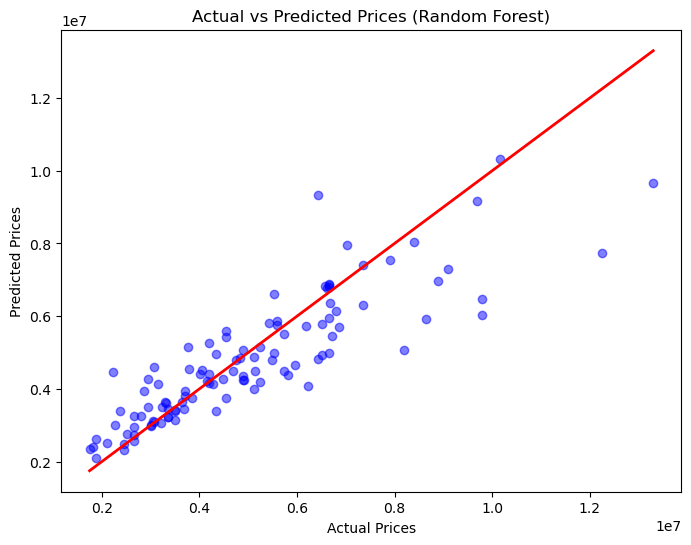

In [45]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Actual vs Predicted Prices (Random Forest)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()


In [49]:
predicted_prices = rf_model.predict(X_test)
print("Predicted prices : \n")
print(predicted_prices)


Predicted prices : 

[ 4511360.   6800418.8  3793300.   4819220.   3262455.   4255020.
  5155640.   5600420.   2496760.   3223195.5 10331930.   2949590.
  3240160.   3447920.   2997750.   3262000.   2728918.5  6319950.
  3500630.   3953005.   5449990.   5822180.   2109450.   4198670.
  4405100.   7725340.   3087140.   4872280.   6483540.   2769200.
  6138790.   3383380.   6870430.   4272800.   3601150.   5273380.
  5082140.   3643990.   3423105.   3402140.   4787790.   3445085.
  6881140.   4251800.   4137770.   4280990.   6837670.   4480560.
  2995160.   2414051.5  8047950.4  2320640.   4126360.   4417910.
  3504550.   2349644.5  6032110.   2500284.5  4954950.   3113740.
  3761590.   3149790.   4808090.   4608940.   3742445.   4922610.
  6360013.8  4003580.   5427030.   4988970.   3647910.   5758439.4
  4542650.   6781740.   3069010.   5950420.   4489205.   4856320.
  5709620.   4461625.   7966560.   4213930.   5724145.   5795685.
  2615025.   5070870.   2577400.   4162690.   9657328.

In [71]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming that 'scaler' is already fitted on the training data (X_train)
# Create new data with all features used during training, excluding 'price'
new_data = pd.DataFrame({
    'area': [3000],
    'bedrooms': [4],
    'bathrooms': [2],
    'stories': [2],
    'mainroad': [1],
    'guestroom': [0],
    'basement': [1],
    'hotwaterheating': [0],
    'airconditioning': [1],
    'parking': [1],
    'prefarea': [0],
    'furnishingstatus': [1],
    'price_per_sqft': [0]  # Placeholder, if your model expects this feature
})

# Apply scaling to the new data using the pre-fitted scaler
new_data_scaled = scaler.transform(new_data)

# Make the prediction with the scaled data
predicted_price_new = rf_model.predict(new_data_scaled)

# Show the predicted price for the new house
print(f"Predicted Price for the new house: {predicted_price_new[0]}")


Predicted Price for the new house: 7038109.4


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
